epoch    a0      a1      a2      a3      cost
0 [0.17956051] [-0.14816037] [-0.34861907] [-0.65858495] 9161.427
50 [0.46151316] [0.09645146] [-0.5055107] [-0.41396463] 6547.4683
100 [0.73653305] [0.3214017] [-0.4432112] [-0.18884784] 4533.8813
150 [0.94674236] [0.52338356] [-0.38737002] [0.01360791] 3039.2144
200 [1.1094426] [0.70147836] [-0.3373124] [0.19251974] 1967.4929
250 [1.2263986] [0.855321] [-0.29297873] [0.34757283] 1227.7035
300 [1.2980232] [0.9851741] [-0.25390515] [0.4790759] 737.7688
350 [1.3257948] [1.0919929] [-0.21973276] [0.58801925] 427.40253
400 [1.3131967] [1.1774065] [-0.19006225] [0.67605066] 239.78113
450 [1.2657356] [1.2436072] [-0.1644692] [0.7453623] 131.72852
500 [1.1903256] [1.2931627] [-0.14251383] [0.79850835] 72.49822
550 [1.0943742] [1.3288028] [-0.12374819] [0.8381901] 41.595814
600 [0.9849331] [1.3532037] [-0.1077273] [0.86704993] 26.234104
650 [0.8681259] [1.3688226] [-0.09402507] [0.8875091] 18.937176
700 [0.7489006] [1.3777894] [-0.08225108] [0.901

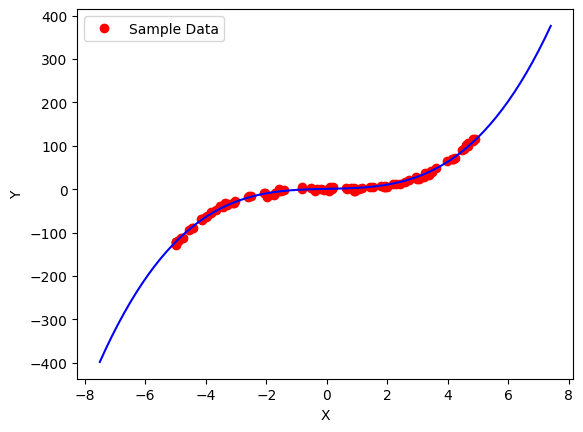

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


X = np.random.uniform(-5, 5, 100) # 100개의 균등 분포 데이터 생성
noise = np.random.normal(0, 3, X.shape) # 출력 데이터에 추가할 임의의 노말 랜덤 데이터 생성
Y = np.power(X, 3) + noise # 입력 데이터에 임의의 값을 더한 100개의 출력 데이터 생성

# 입력 데이터와 출력 데이터를 텐서 형식으로 변환
X = tf.constant(X, dtype=tf.float32)
Y = tf.constant(Y, dtype=tf.float32)

a0 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a1 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a2 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a3 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# a0 = tf.Variable(tf.random.normal([1], -1.0, 1.0))
# a1 = tf.Variable(tf.random.normal([1], -1.0, 1.0))
# a2 = tf.Variable(tf.random.normal([1], -1.0, 1.0))
# a3 = tf.Variable(tf.random.normal([1], -1.0, 1.0))

# GradientDescent
# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.0000009)

# Adam
optimizer = tf.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False, name='Adam')

# SGD
# optimizer = tf.optimizers.SGD(learning_rate=0.0000009)

@tf.function()
def cost_eval():
  hypothesis = a0+a1*X+(a2*(X**2))+(a3*(X**3)) # y = a0+a1*x+a2*x^2+a3*x^3 (3차 함수)
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost
cost_prev= float('inf') # 이전 에폭에서의 비용 함수 값을 저장
print("epoch    a0      a1      a2      a3      cost")

epoch=0
while True: # 무한 루프 생성
  optimizer.minimize(cost_eval, var_list=[a0,a1,a2,a3]) # 비용을 최소화 하는 것이 최종 목표
  cost_current=cost_eval().numpy()

  # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인
  if epoch % 50 == 0:
    print(epoch, a0.numpy(), a1.numpy(), a2.numpy(), a3.numpy(), cost_eval().numpy())


  if abs(cost_prev-cost_current)<0.02: # 비용 함수의 값이 충분히 작아지면 루프를 종료 0.001은 임계값
    break

  cost_prev=cost_current
  epoch+=1 # 에폭 수를 추적하기 위해 루프 반복마다 1씩 증가

print("\n=== Test ===")
x=5.
print('X:', x, 'Y:', (a0+a1*x+(a2*(x**2))+(a3*(x**3))).numpy())
x=2.5
print('X:', x, 'Y:', (a0+a1*x+(a2*(x**2))+(a3*(x**3))).numpy())

# 그래프를 그리기 위해 새로운 X값을 입력
new_X = tf.range(-7.5, 7.5, 0.1)
# 선형 회귀직선을 이용하여 예측 Y값 계
new_Y = a0+(a1*new_X)+(a2*(new_X**2))+(a3*(new_X**3))

plt.plot(X,Y,'ro', label='Sample Data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5090 - accuracy: 0.8189
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3733 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3403 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3162 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3004 - accuracy: 0.8881
313/313 - 1s - loss: 0.3795 - accuracy: 0.8685 - 711ms/epoch - 2ms/step

테스트 정확도: 0.8684999942779541
313/313 [==============================] - 1s 2ms/step


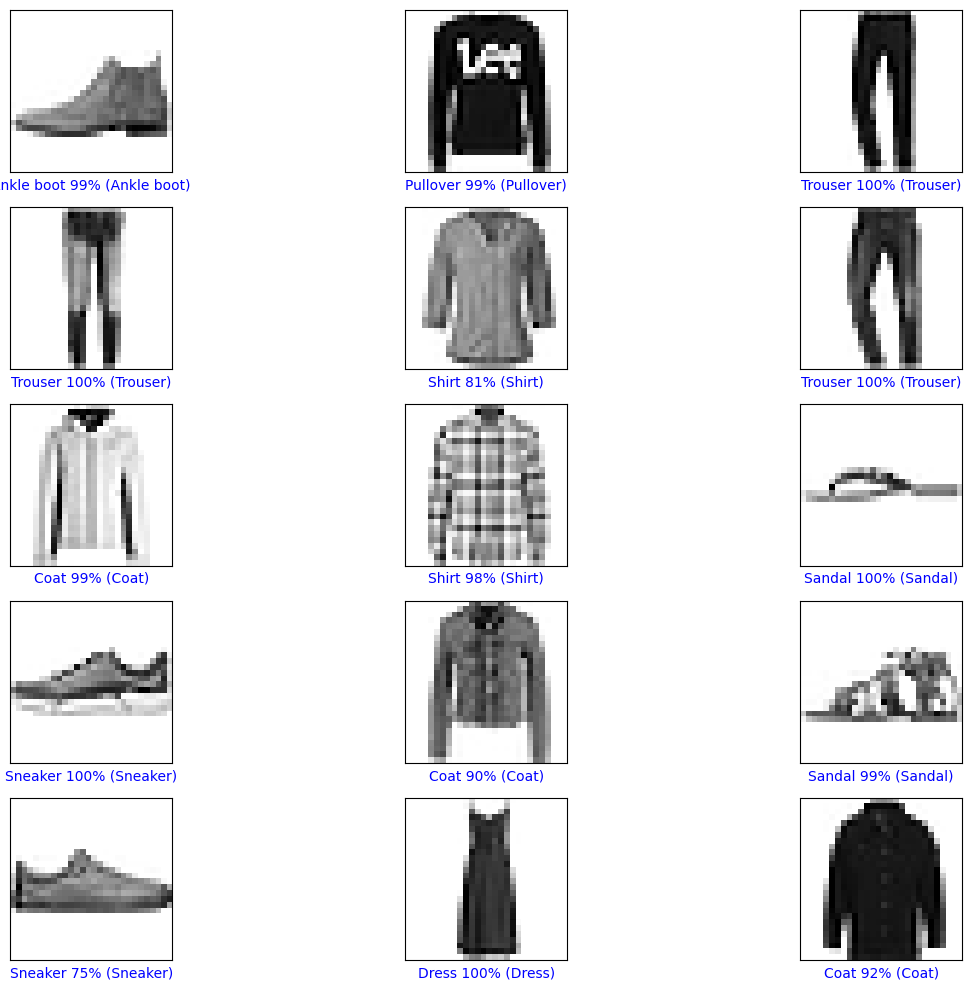

In [ ]:
# 필요한 라이브러리 import
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


# 데이터 로드
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 전처리
train_images = train_images / 255.0
test_images = test_images / 255.0

# 모델 구조 설정
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(110, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(train_images, train_labels, epochs=5)

# 모델 테스트
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

# 예측 생성
predictions = model.predict(test_images)

# 그래프를 그리기 위한 함수
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# 예측 결과를 그래프로 출력
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()


In [ ]:
# 필요한 라이브러리 import
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 데이터 로드
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 이미지 차원 확장
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNN 모델 구축
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# 모델 컴파일 및 학습
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# 테스트 세트에서 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 18s 5ms/step - loss: 0.4964 - accuracy: 0.8186 - val_loss: 0.3876 - val_accuracy: 0.8534
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3216 - accuracy: 0.8825 - val_loss: 0.3162 - val_accuracy: 0.8869
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2735 - accuracy: 0.9004 - val_loss: 0.3070 - val_accuracy: 0.8890
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2432 - accuracy: 0.9108 - val_loss: 0.2703 - val_accuracy: 0.9010
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2151 - accuracy: 0.9203 - val_loss: 0.2803 - val_accuracy: 0.8929
313/313 - 1s - loss: 0.2803 - accuracy: 0.8929 - 640ms/epoch - 2ms/step

테스트 정확도: 0.8928999900817871


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MNIST 데이터셋을 로드하여 준비, 샘플 값을 정수에서 부동소수로 변환
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


import matplotlib.pylab as plt

plt.figure(figsize=(6, 1))
for i in range(36):
  plt.subplot(3, 12, i+1)
  plt.imshow(train_images[i], cmap="gray")
  plt.axis("off")
plt.show()


# 28x28차원의 벡터 이미지 6000개 채널은 1개
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_labels[:10])

from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)
print(one_hot_train_labels[:10])

# 층을 차례대로 쌓아 tf.keras.Sequential 모델 생성
# 훈련에 사용할 옵티마이저와 손실 함수를 선택
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())  # Batch Normalization 추가
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())  # Batch Normalization 추가
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())  # Batch Normalization 추가
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())  # Batch Normalization 추가
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=10)




plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

print("\n=================test results====================")
labels = model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels, verbose=2)[1]))

fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i].reshape((28, 28)), cmap=plt.cm.gray_r)

plt.show()

print("=================================================")

CIFAR-10 데이터를 load하여 아래 구조를 갖는 심층 인공신경망을 학습하고 테스트 결과를 화면에 출력하자. CIFAR-10 데이터는 아래와 같이 10개 클래스로 구성된다. 자세한 클래스 구성은 다음과 같다.
-학습 데이터 : 50000개, 32x32 크기의 RGB영상 (3채널)
-테스트 데이터 : 10000개, 32x32 크기의 RGB영상 (3채널)
1. CIFAR-10 데이터를 아래와 같이 오픈한다.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
2. 각 클래스에 대한 label을 아래와 같이 입력해준다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
출력 결과를 plot으로 그릴 때 그림 위에 클래스 번호 대신 클래스 이름이 들어가도록 하자.
3. CNN 모델의 구조, 학습 설정은 마음대로 정해줘.


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                     

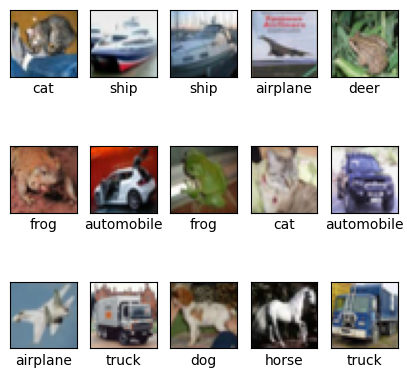

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

# CIFAR-10 데이터 로드
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 데이터 정규화
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
train_images, test_images = train_images / 255.0, test_images / 255.0

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 모델 구성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels), batch_size=32)


test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nAccuracy:', test_acc)
plt.figure(figsize=(5, 5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()



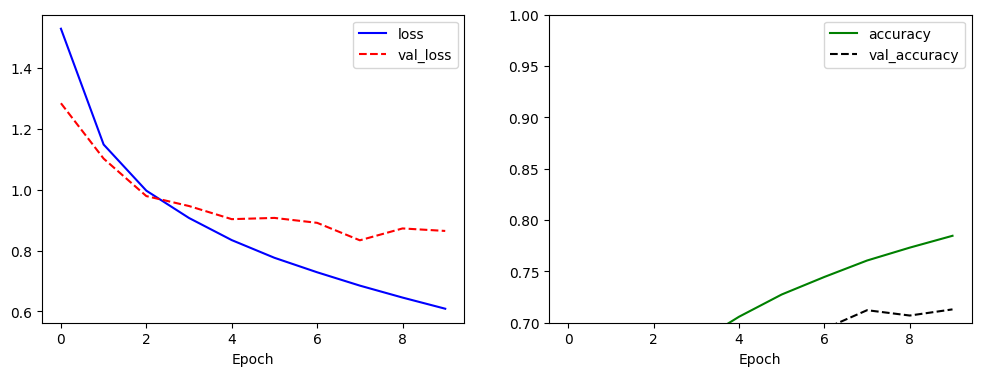

In [19]:
# 손실과 정확도 그래프 그리기
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()



Accuracy: 0.6965000033378601


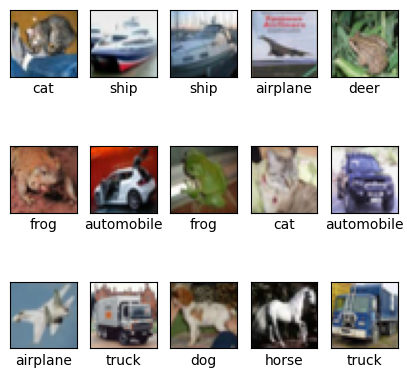

In [24]:
print('\nAccuracy:', test_acc)
plt.figure(figsize=(5, 5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()